# 확률적 경사 하강법

## SGDClassifier

In [59]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [60]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 데이터 전처리 적용
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# fit_transform() 사용
# ss = StandardScaler()
# train_scaled = ss.fit_transform(train_input)
# test_scaled = ss.transform(test_input)

In [62]:
from sklearn.linear_model import SGDClassifier

'''
전체 데이터: N
batch 개수: M
batch 당 데이터 개수: N / M

1. SGD
- 1개의 데이터로만 gradient descent 수행 (M = N)

2. Mini-batch GD (Mini-batch SGD)
- 전체 데이터를 N개의 batch로 쪼개 gradient descent 수행 (1 <= M <= N)

3. GD
- 전체 데이터를 사용해 gradient descent 수행 (M = 1)
'''

# loss='log_loss'를 사용하는 SGDClassifier 생성
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

# 모델 학습 (10 epochs)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

print('---------------------------------------')

# 모델 추가 학습 (이전 epoch에서 1회 추가 학습)
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.8
---------------------------------------
0.8067226890756303
0.8


/Users/kimjinbeom/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## 에포크와 과대/과소적합

In [63]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

classes = np.unique(train_target)
print(classes)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [64]:
train_score = []
test_score = []

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

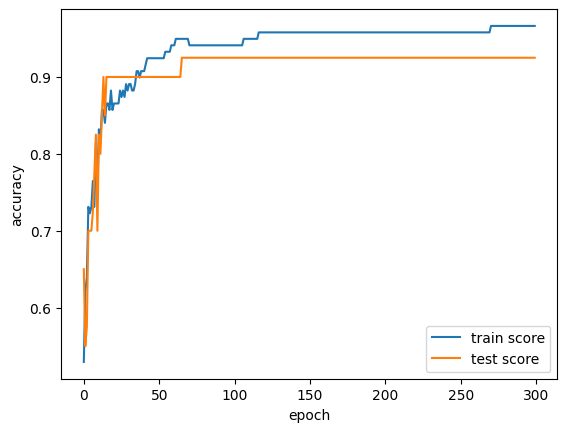

In [65]:
import matplotlib.pyplot as plt

plt.plot(train_score, label='train score')
plt.plot(test_score, label='test score')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [66]:
# logistic regression
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

print('---------------------------------------')

# linear SVM
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
---------------------------------------
0.9495798319327731
0.925


# 결정 트리

## 로지스틱 회귀로 와인 분류하기

In [67]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [68]:
# 데이터 구조 분석
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [69]:
# 데이터 통계 분석
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [70]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

# 데이터 전처리
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

(5197, 3) (1300, 3)


## 설명하기 쉬운 모델과 어려운 모델

### 선형 회귀

In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print('---------------------------------------')
print(lr.coef_, lr.intercept_)

0.7808350971714451
0.7776923076923077
---------------------------------------
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### 결정 트리

In [73]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 생성
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


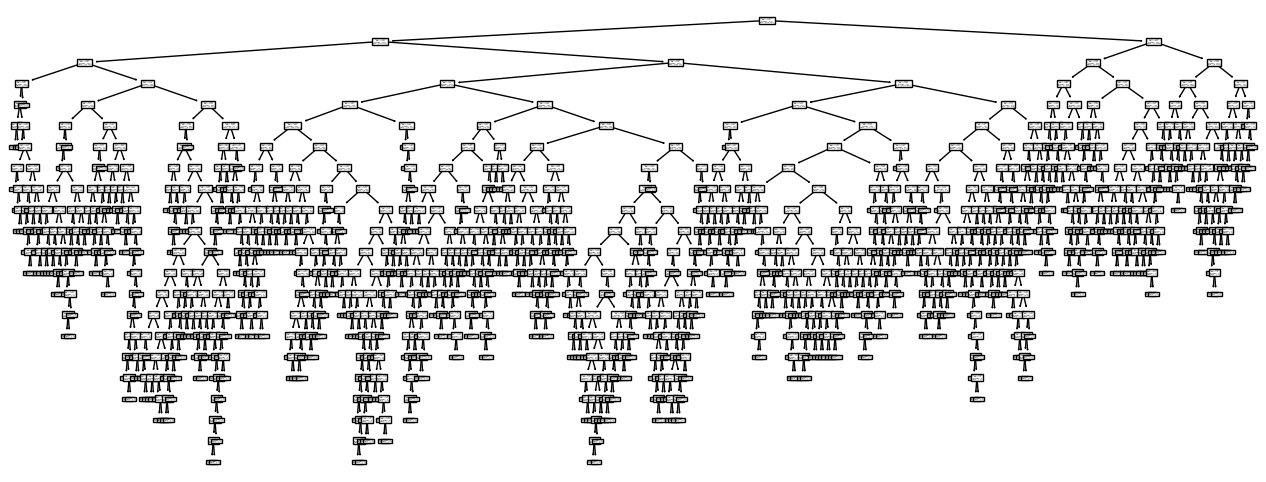

In [74]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 트리 분석
plt.figure(figsize=(16, 6))
plot_tree(dt)
plt.show()

In [75]:
# 루트 노드를 기준으로 max_depth 까지 출력
plt.figure(figsize=(8, 6))
# 
plt.show()

<Figure size 800x600 with 0 Axes>

### 가지치기

In [76]:
# 트리의 depth를 제한해 학습
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


In [77]:
# 트리 분석
plt.figure(figsize=(12, 8))
# 
plt.show()

<Figure size 1200x800 with 0 Axes>

In [78]:
# 원본 데이터를 그대로 사용해 학습 (데이터 전처리 미적용)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


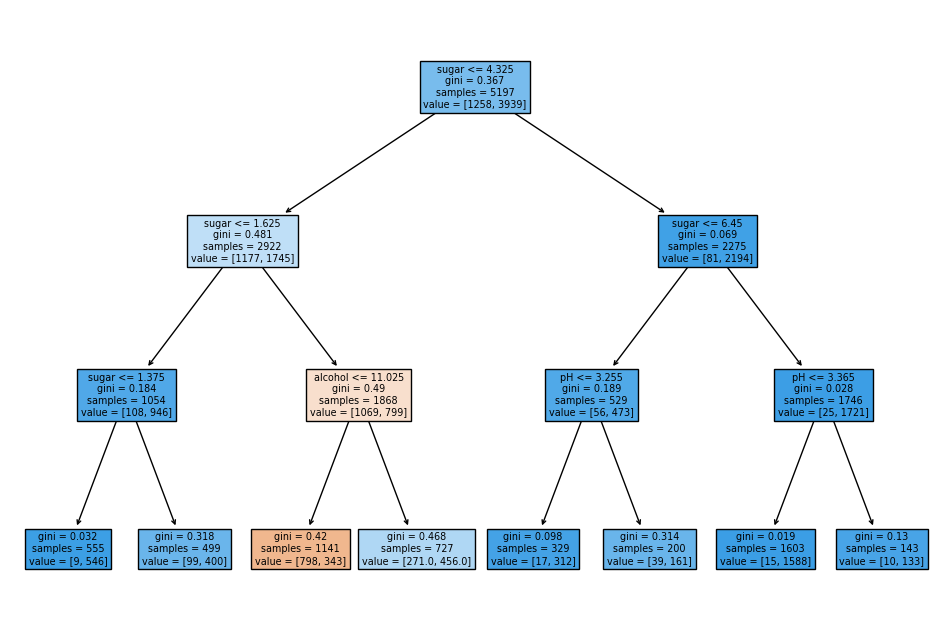

In [79]:
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [80]:
# 분류에 관여하는 특성의 중요도 출력
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [81]:
# min_impurity_decrease 값 이하의 노드는 분할하지 않음 
# impurity_decrease = N_t / N * (impurity - (N_t_R / N_t * right_impurity) - (N_t_L / N_t * left_impurity))

dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


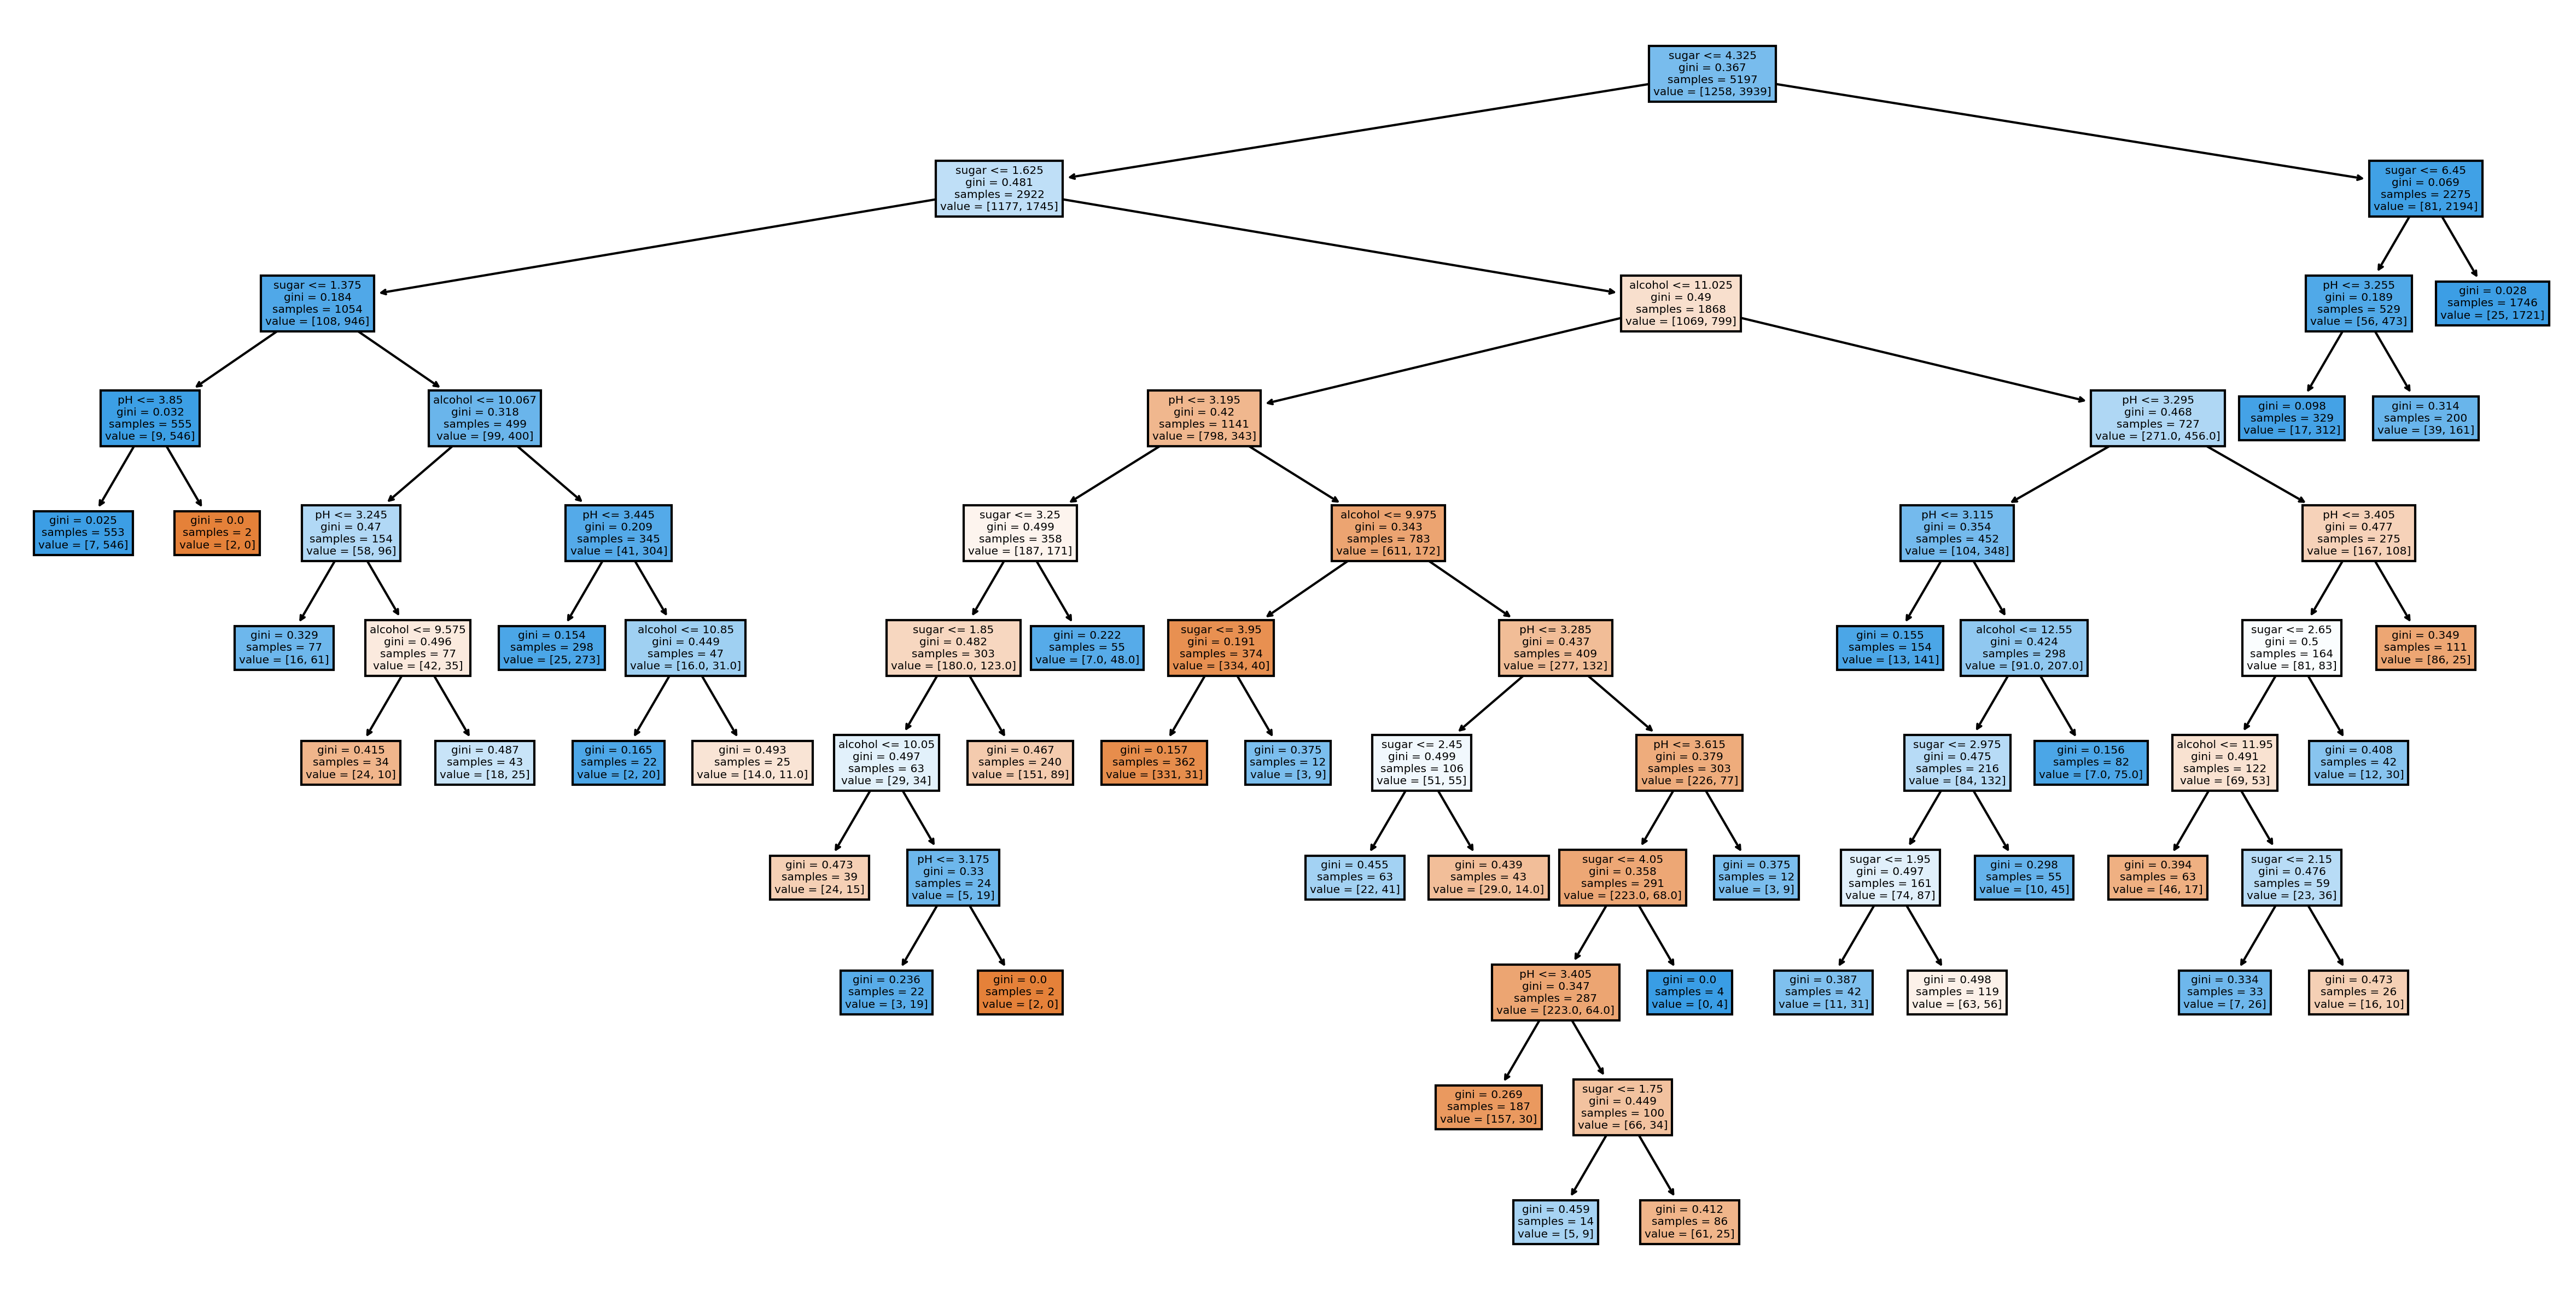

In [82]:
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()